In [1]:
# Install the FRED API library
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='5db662f99b81cdeea8128328e60f6fec')

In [2]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())


Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-06-01         31.26  321.500
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031


In [4]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-06-01         31.26  321.500  31.603325
2025-07-01         31.35  322.132  31.632132
2025-08-01         31.45  323.364  31.612130
2025-09-01         31.52  324.368  31.584426
2025-11-01         31.73  325.031  31.730000


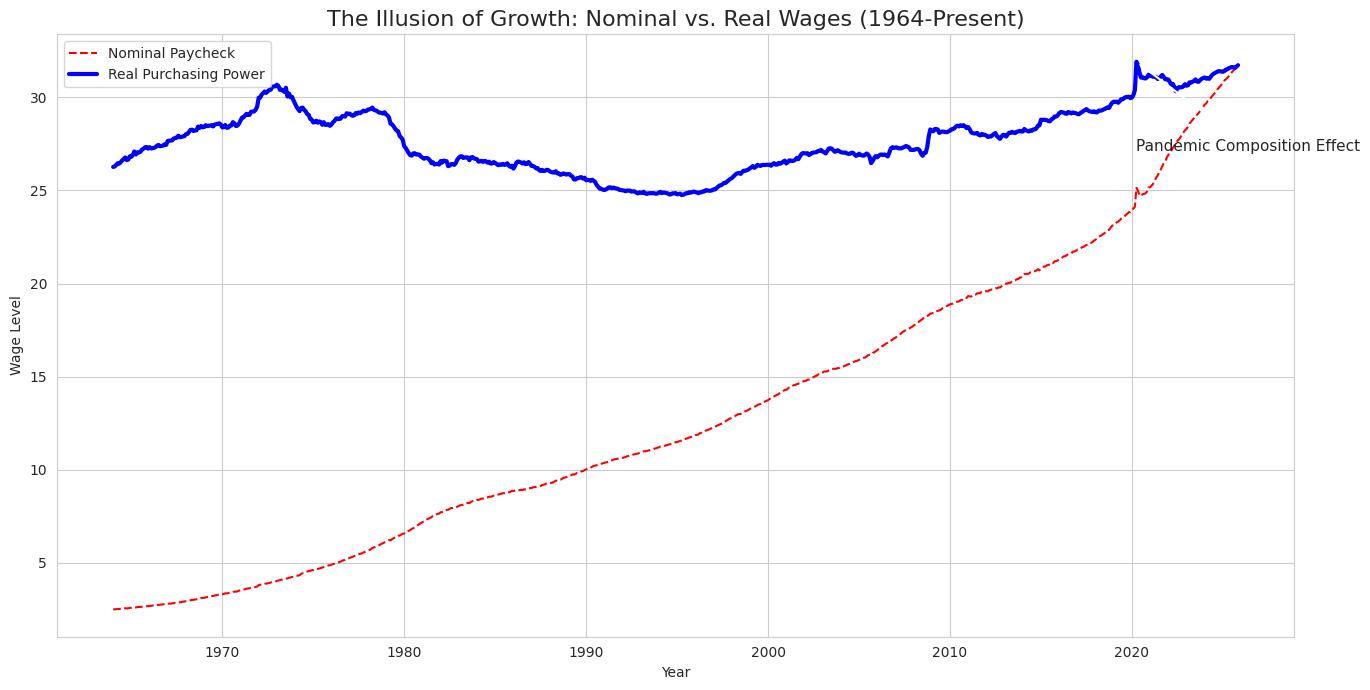

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn theme
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(14, 7))

# Plot time series
plt.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    label="Nominal Paycheck"
)

plt.plot(
    df.index,
    df["Real_Wage"],
    linewidth=3,
    color="blue",
    label="Real Purchasing Power"
)

# Identify the 2020 spike in real wages
real_2020 = df[df.index.year == 2020]["Real_Wage"]
spike_date = real_2020.idxmax()
spike_value = real_2020.max()

# Annotation for pandemic effect
plt.annotate(
    "Pandemic Composition Effect",
    xy=(spike_date, spike_value),
    xytext=(spike_date, spike_value * 0.85),
    arrowprops=dict(arrowstyle="->", linewidth=1.5),
    fontsize=11
)

# Titles and labels
plt.title(
    "The Illusion of Growth: Nominal vs. Real Wages (1964-Present)",
    fontsize=16
)
plt.xlabel("Year")
plt.ylabel("Wage Level")

# Legend
plt.legend()

# Layout
plt.tight_layout()
plt.show()

"""
Comparing the blue line to the red line, the blue line looks a lot more flat than the red line
"""

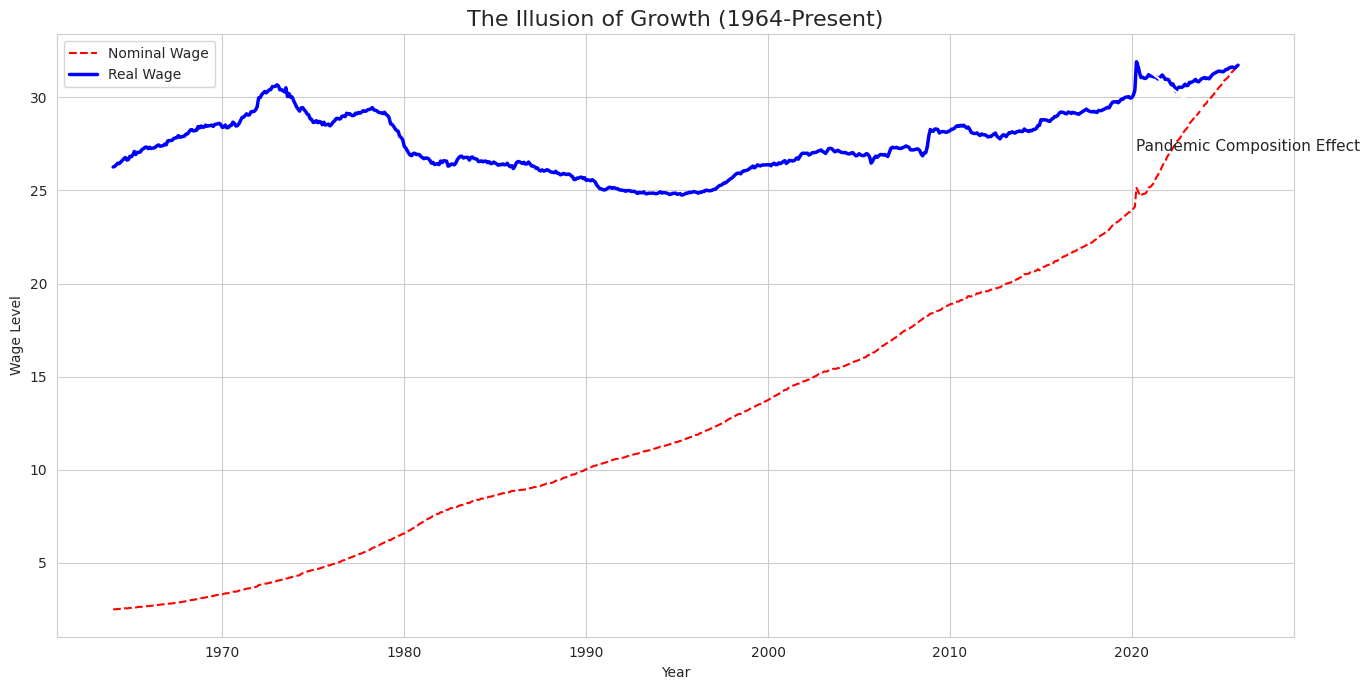

In [6]:
# Exercise 1
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(14, 7))

# Plot the wage series
plt.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    label="Nominal Wage"
)

plt.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=2.5,
    label="Real Wage"
)

# Find the 2020 spike in real wages
real_2020 = df[df.index.year == 2020]["Real_Wage"]
spike_date = real_2020.idxmax()
spike_value = real_2020.max()

# Annotate the spike
plt.annotate(
    "Pandemic Composition Effect",
    xy=(spike_date, spike_value),
    xytext=(spike_date, spike_value * 0.85),
    arrowprops=dict(arrowstyle="->", linewidth=1.5),
    fontsize=11
)

# Title and labels
plt.title("The Illusion of Growth (1964-Present)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Wage Level")

# Legend and layout
plt.legend()
plt.tight_layout()
plt.show()


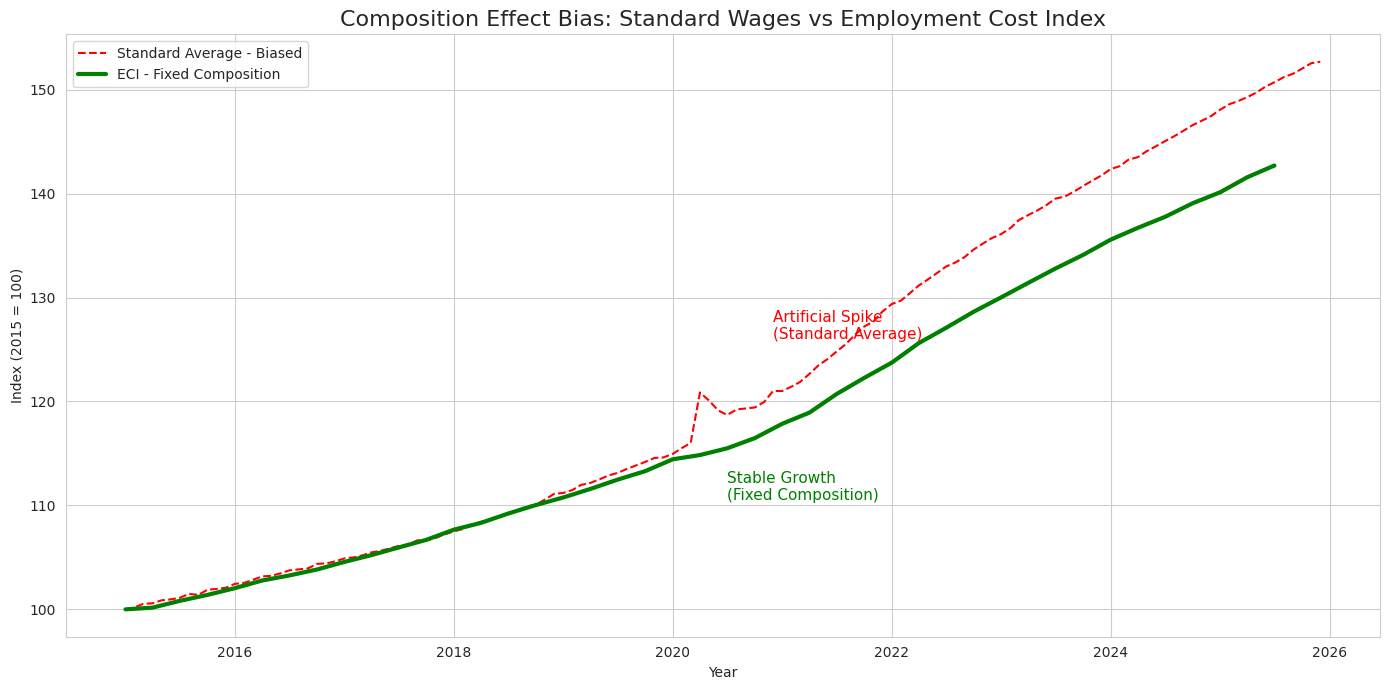

In [8]:
# Exercise 2
import matplotlib.pyplot as plt
import pandas as pd

# 1. Fetch Employment Cost Index (ECI) from FRED
eci = fred.get_series("ECIWAG")

# Ensure datetime index
eci.index = pd.to_datetime(eci.index)
wages.index = pd.to_datetime(wages.index)

# 2. Filter both series from 2015-01-01 onward
start_date = "2015-01-01"
wages_f = wages[wages.index >= start_date]
eci_f = eci[eci.index >= start_date]

# 3. Rebase both series to 100
wages_rebased = (wages_f / wages_f.iloc[0]) * 100
eci_rebased = (eci_f / eci_f.iloc[0]) * 100

# 4. Plot both series
plt.figure(figsize=(14, 7))

plt.plot(
    wages_rebased.index,
    wages_rebased,
    linestyle="--",
    color="red",
    label="Standard Average - Biased"
)

plt.plot(
    eci_rebased.index,
    eci_rebased,
    color="green",
    linewidth=3,
    label="ECI - Fixed Composition"
)

# 5. Annotate divergence around 2020
div_2020 = wages_rebased[wages_rebased.index.year == 2020]
if not div_2020.empty:
    spike_date = div_2020.idxmax()
    spike_value = div_2020.max()

    plt.annotate(
        "Artificial Spike\n(Standard Average)",
        xy=(spike_date, spike_value),
        xytext=(spike_date, spike_value + 5),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        fontsize=11,
        color="red"
    )

eci_2020 = eci_rebased[eci_rebased.index.year == 2020]
if not eci_2020.empty:
    stable_date = eci_2020.index[len(eci_2020) // 2]
    stable_value = eci_2020.loc[stable_date]

    plt.annotate(
        "Stable Growth\n(Fixed Composition)",
        xy=(stable_date, stable_value),
        xytext=(stable_date, stable_value - 5),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        fontsize=11,
        color="green"
    )

# Labels and formatting
plt.title("Composition Effect Bias: Standard Wages vs Employment Cost Index", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Index (2015 = 100)")
plt.legend()
plt.tight_layout()
plt.show()
